# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

In [4]:
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [6]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880
1,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906
2,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962
3,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000
4,Our investigation and cooperation with law enf...,0.5994,0.149,0.000,0.851


In [8]:
# Create the ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,According to a public letter from the U.S. Com...,0.5719,0.132,0.000,0.868
1,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.000,0.947
2,Enlarge/ A screenshot from Wozniak's lawsuit s...,-0.6808,0.000,0.177,0.823
3,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000
4,"<ul><li>Bitcoin crossed the $11,000 level and ...",-0.4215,0.000,0.083,0.917


In [9]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.00000,20.000000,20.000000,20.000000
mean,-0.22255,0.046000,0.091800,0.862200
std,0.46601,0.044974,0.084671,0.076359
min,-0.88040,0.000000,0.000000,0.687000
25%,-0.62950,0.000000,0.000000,0.834250
50%,-0.23565,0.044000,0.088500,0.858500
75%,0.08990,0.066250,0.145500,0.915500
max,0.63690,0.149000,0.277000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.169512,0.089353,0.053235,0.857471
std,0.488875,0.077845,0.059055,0.087565
min,-0.680800,0.000000,0.000000,0.660000
25%,-0.340000,0.000000,0.000000,0.814000
50%,0.361200,0.083000,0.051000,0.868000
75%,0.571900,0.136000,0.088000,0.917000
max,0.726900,0.226000,0.177000,1.000000


### Questions:

**Important note:** The sample answers may vary depending on when this code is running since news may change over time.

Q: Which coin had the highest mean positive score?

A: Ethereum had a slightly higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest Positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens


In [14]:
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Just hackers burning up 0day like it’s a fire ...,0.0258,0.061,0.059,0.880,"[hacker, burning, 0day, like, ’, fire, sale, I..."
1,"Authorities in Tampa, Florida have arrested a ...",-0.4767,0.000,0.094,0.906,"[Authorities, Tampa, Florida, arrested, 17-yea..."
2,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962,"[Reuters, previously, reported, FBI, would, la..."
3,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000,"[account, tweeted, variant, message, someone, ..."
4,Our investigation and cooperation with law enf...,0.5994,0.149,0.000,0.851,"[investigation, cooperation, law, enforcement,..."


In [15]:
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,According to a public letter from the U.S. Com...,0.5719,0.132,0.000,0.868,"[According, public, letter, U.S., Comptroller,..."
1,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.000,0.947,"[inventor, AWS, Lambda, Tim, Wagner, former, h..."
2,Enlarge/ A screenshot from Wozniak's lawsuit s...,-0.6808,0.000,0.177,0.823,"[Enlarge/, screenshot, Wozniak, lawsuit, show,..."
3,Crypto has been on a tear in the last week.\r\...,0.0000,0.000,0.000,1.000,"[Crypto, tear, last, week, Bitcoin, 18, last, ..."
4,"<ul><li>Bitcoin crossed the $11,000 level and ...",-0.4215,0.000,0.083,0.917,"[ul, li, Bitcoin, crossed, 11,000, level, trad..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Elon', 'Musk'), 3),
 (('Bill', 'Gates'), 3),
 (('Twitter', 'account'), 3),
 (('high-profile', 'account'), 2),
 (('char', 'Image'), 2),
 (('Gates', 'Barack'), 2),
 (('Barack', 'Obama'), 2),
 (('high-profile', 'Twitter'), 2),
 (('hacker', 'burning'), 1),
 (('burning', '0day'), 1),
 (('0day', 'like'), 1),
 (('like', '’'), 1),
 (('’', 'fire'), 1),
 (('fire', 'sale'), 1),
 (('sale', 'Imagine'), 1),
 (('Imagine', 'getting'), 1),
 (('getting', 'key'), 1),
 (('key', 'Twitter'), 1),
 (('Twitter', 'kingdom'), 1),
 (('kingdom', '--'), 1)]

In [18]:
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('last', 'week'), 2),
 (('Satoshi', 'Nakaboto'), 2),
 (('paper', 'wallet'), 2),
 (('According', 'public'), 1),
 (('public', 'letter'), 1),
 (('letter', 'U.S.'), 1),
 (('U.S.', 'Comptroller'), 1),
 (('Comptroller', 'Currency'), 1),
 (('Currency', 'federal'), 1),
 (('federal', 'group'), 1),
 (('group', 'responsible'), 1),
 (('responsible', 'security'), 1),
 (('security', 'banking'), 1),
 (('banking', 'system'), 1),
 (('system', 'bank'), 1),
 (('bank', 'allowed'), 1),
 (('allowed', 'hold'), 1),
 (('hold', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'doe…'), 1),
 (('doe…', '+1760'), 1)]

In [19]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('account', 13),
 ('Twitter', 12),
 ('bitcoin', 7),
 ('scam', 6),
 ('hacker', 5),
 ('high-profile', 5),
 ('investigation', 5),
 ('’', 4),
 ('would', 4)]

In [21]:
# Get the top 10 words
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 16),
 ('Bitcoin', 10),
 ('Ethereum', 7),
 ('blockchain', 4),
 ('crypto', 4),
 ('wallet', 4),
 ('cryptocurrency', 4),
 ('’', 3),
 ('new', 3),
 ('last', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

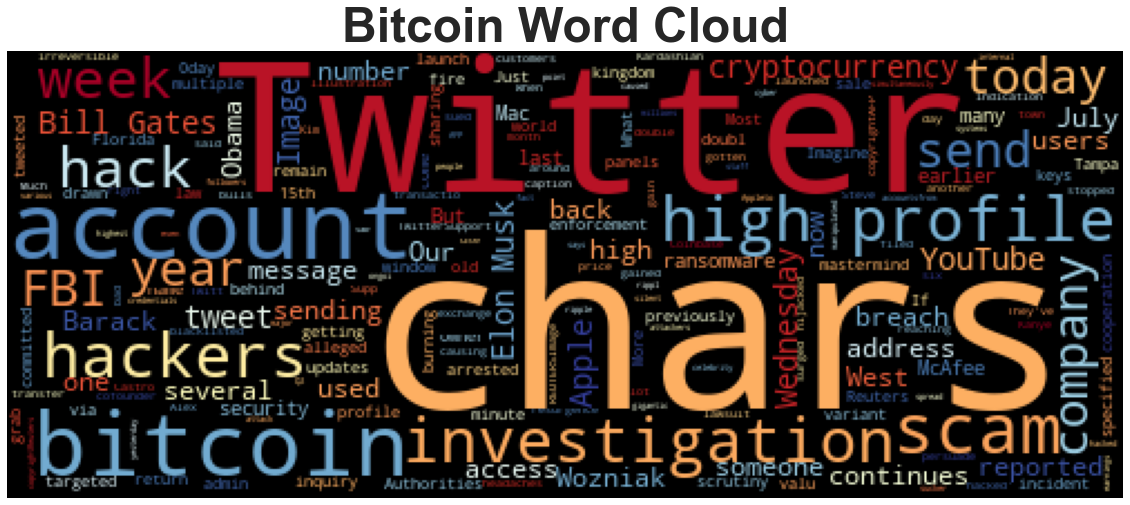

In [24]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

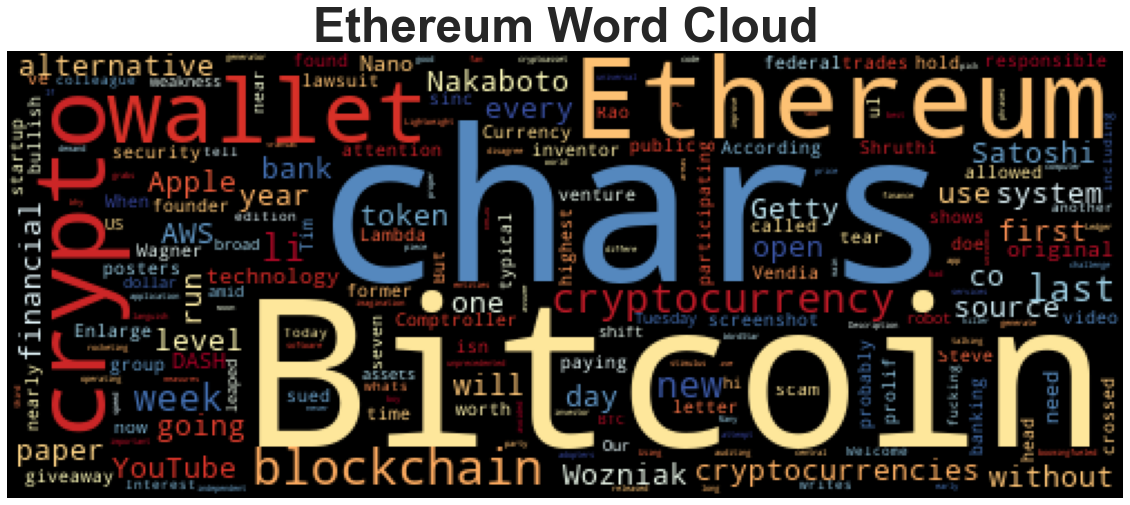

In [25]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

"Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars]Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars]Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars]Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars]Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @Twit

In [30]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [32]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Twitter ORG
Tampa GPE
Florida GPE
17-year-old DATE
Twitter Bitcoin ORG
July 15th, 2020 DATE
FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
30-minute TIME
bitcoin GPE
today DATE
1,268.19 MONEY
six-month DATE
11,203.90 MONEY
one-day DATE
12.73% PERCENT
Alex Castro PERSON
Coinbase ORG
around 1,100 CARDINAL
Apple ORG
YouTube PRODUCT
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter ORG
YouTube PRODUCT
Wozniak PERSON
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
last week DATE
Twitter ORG
today DATE
week DATE
100 CARDINAL
Twitter ORG
today DATE
the year DATE
John McAfee
  PERSON
Three years ago DATE
this date DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
Francisco ORG
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afte

---

## Ethereum NER

In [33]:
# Concatenate all of the bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s probably worth paying attention. Vendia, as the new venture is called, com… [+4751 chars]Enlarge/ A screenshot from Wozniak\'s lawsuit shows a typical "Bitcoin giveaway" scam video on YouTube.\r\n4 with 4 posters participating\r\nApple co-founder Steve Wozniak has sued YouTube over the prolif… [+3424 chars]Crypto has been on a tear in the last week.\r\nBitcoin is up 18% in the last seven days:\r\nEthereum is up over 30% in the last week:\r\nBut this isn’t the first time we’ve had a bullish run in crypto sinc… [+1941 chars]<ul><li>Bitcoin crossed the $11,000 level and trades near its highest level in nearly a year on Tuesday amid US dollar weakness an

In [34]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [35]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [36]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

U.S. GPE
AWS Lambda ORG
Tim Wagner PERSON
Shruthi Rao PERSON
Vendia ORG
Wozniak PERSON
Bitcoin GPE
YouTube PRODUCT
4 CARDINAL
4 CARDINAL
Apple ORG
Steve Wozniak PERSON
YouTube ORG
the last week DATE
Bitcoin GPE
18% PERCENT
the last seven days DATE
over 30% PERCENT
the last week DATE
first ORDINAL
Bitcoin GPE
11,000 MONEY
nearly a year DATE
Tuesday DATE
US GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
bitcoin GPE
third ORDINAL
one CARDINAL
WordStar FAC
Apple ORG
DASH ORG
Bitcoin GPE
2009 DATE
CRYPTO UNIVERSE Dash PERSON
Bitcoin GPE
two CARDINAL
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
chars]Five years ago this week DATE
first ORDINAL
Bitcoins ORG
Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
Bitcoin GPE
